# Problem Set 5

See [Optimization](../scientific/optimization.ipynb), [Introduction](../pandas/intro.ipynb), and [Basic Functionality](../pandas/basics.ipynb)

In [50]:
import pandas as pd
import numpy as np

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

## Setup for Question 1-5

Load data from the [Basic Functionality](../pandas/basics.ipynb) lecture.

In [51]:
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates=["Date"])

And do the same manipulation as in the pandas basics lecture.

In [52]:
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]

unemp = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
    [states]
)

## Question 1

At each date, what is the minimum unemployment rate across all states
in our sample?

In [53]:
# Your code here

print("The minimum unemployment rate across all states is ",unemp.min(axis=1) )
unemp_min = unemp.min(axis = 1)
unemp_min.head()

The minimum unemployment rate across all states is  Date
2000-01-01    3.3
2000-02-01    3.2
2000-03-01    3.2
2000-04-01    3.3
2000-05-01    3.5
             ... 
2017-08-01    4.0
2017-09-01    3.9
2017-10-01    3.9
2017-11-01    3.9
2017-12-01    3.9
Length: 216, dtype: float64


Date
2000-01-01    3.3
2000-02-01    3.2
2000-03-01    3.2
2000-04-01    3.3
2000-05-01    3.5
dtype: float64

What was the median unemployment rate in each state?

In [54]:
# Your code here
unemp.median(axis= 0)

state
Arizona       5.80
California    6.50
Florida       5.35
Illinois      6.15
Michigan      7.00
New York      5.70
Texas         5.40
dtype: float64

What was the maximum unemployment rate across the states in our
sample? In what state did it happen? In what month/year was this
achieved?

- Hint 1: What Python type (not `dtype`) is returned by a reduction?  
- Hint 2: Read documentation for the method `idxmax`.  

In [55]:
# Your code here

print("for each state", unemp.max())
print("for each state happened in", unemp.idxmax())
print("The highest number across all states is", unemp.max().max())
date =  unemp.max(axis = 1).idxmax()





print("The highest 14.6 happened in", unemp.max().idxmax(axis = 0), "happened in the", date)
print("the", date.month, "th month", date.day, "th day")




for each state state
Arizona       10.9
California    12.3
Florida       11.3
Illinois      11.3
Michigan      14.6
New York       8.9
Texas          8.3
dtype: float64
for each state happened in state
Arizona      2009-11-01
California   2010-03-01
Florida      2010-01-01
Illinois     2009-12-01
Michigan     2009-06-01
New York     2009-11-01
Texas        2009-08-01
dtype: datetime64[ns]
The highest number across all states is 14.6
The highest 14.6 happened in Michigan happened in the 2009-06-01 00:00:00
the 6 th month 1 th day


Classify each state as high or low volatility based on whether the
variance of their unemployment is above or below 4.

In [56]:
# Your code here
def high_or_low_var(s):
   
    if s.var() < 4:
        out = "Low"
    else:
        out = "High"

    return out
unemp.agg(high_or_low_var)


state
Arizona       High
California    High
Florida       High
Illinois       Low
Michigan      High
New York       Low
Texas          Low
dtype: object

## Question 2

Imagine that we want to determine whether unemployment was high (> 6.5),
medium (4.5 < x <= 6.5), or low (<= 4.5) for each state and each month.

Write a Python function that takes a single number as an input and
outputs a single string which notes whether that number is high, medium, or low.

In [57]:
# Your code here
def high_medium_low(a):
   
    if a > 6.5:
        out = "High"
    elif a<=4.5:
        out = "Low"
    else:
        out = "medium"

    return out



Pass your function to either `apply` or `applymap` and save the
result in a new DataFrame called `unemp_bins`.

In [58]:
# Your code here
unemp_bins = unemp.applymap(high_medium_low)
unemp_bins

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,Low,medium,Low,Low,Low,medium,medium
2000-02-01,Low,medium,Low,Low,Low,medium,medium
2000-03-01,Low,medium,Low,Low,Low,medium,Low
2000-04-01,Low,medium,Low,Low,Low,medium,Low
2000-05-01,Low,medium,Low,Low,Low,medium,Low
...,...,...,...,...,...,...,...
2017-08-01,medium,medium,Low,medium,medium,medium,Low
2017-09-01,medium,Low,Low,medium,medium,medium,Low
2017-10-01,medium,Low,Low,medium,medium,medium,Low


## Question 3

This exercise has multiple parts:

Use another transformation on `unemp_bins` to count how many
times each state had each of the three classifications.

- Hint 1: Will you need to use `apply` or `applymap` for transformation?  
- Hint 2: Try googling “pandas count unique value” or something similar to find the proper transformation.  

In [59]:
low = (unemp_bins=='Low').sum()
medium = (unemp_bins=='medium').sum()
high = (unemp_bins=='High').sum()
df = pd.concat([high,low,medium], axis=1)
df.columns = ['High', 'low','medium']
df.T


state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
High,75,106,68,91,142,65,51
low,44,4,69,19,17,22,58
medium,97,106,79,106,57,129,107


In [60]:
unemp_bins.apply(pd.value_counts)

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
High,75,106,68,91,142,65,51
Low,44,4,69,19,17,22,58
medium,97,106,79,106,57,129,107


         0  Arizona  California  Florida  Illinois  Michigan  New York  Texas
High   NaN       75         106       68        91       142        65     51
Low    NaN       44           4       69        19        17        22     58
medium NaN       97         106       79       106        57       129    107


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,Arizona,California,Florida,Illinois,Michigan,New York,Texas
High,75,106,68,91,142,65,51
Low,44,4,69,19,17,22,58
medium,97,106,79,106,57,129,107


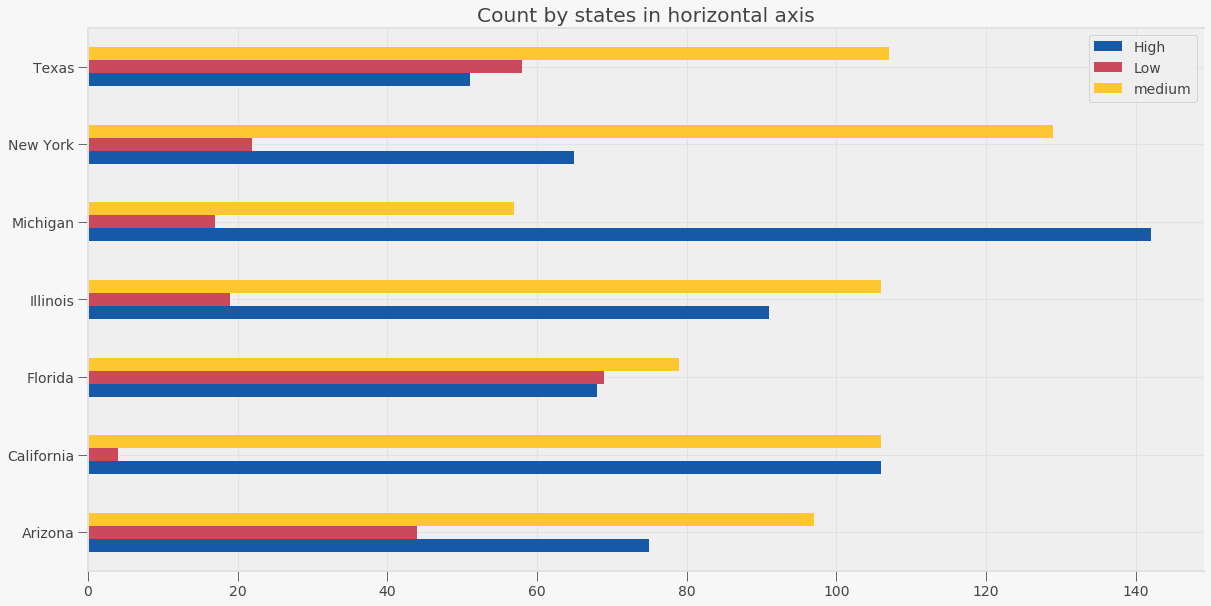

In [61]:
# Your code here

# Another method
#my stupid loop

pd_new = pd.Series() #create an empty panda series
#concact every state in one dataframe
for state in unemp_bins.columns:
    series = unemp_bins[state].value_counts()
    pd_new = pd.concat([pd_new,series],axis=1, sort=True)
print(pd_new) 
pd_new.drop(0, axis=1, inplace=True)
pd_Transpose = pd_new.T

ax = pd_Transpose.plot.barh(figsize=(20,10))
ax.set_title("Count by states in horizontal axis")
ax.spines['top'].set_visible(True)
ax.set_axisbelow(True)



pd_new

Construct a horizontal bar chart to detail the occurrences of each level.
Use one bar per state and classification for 21 total bars.

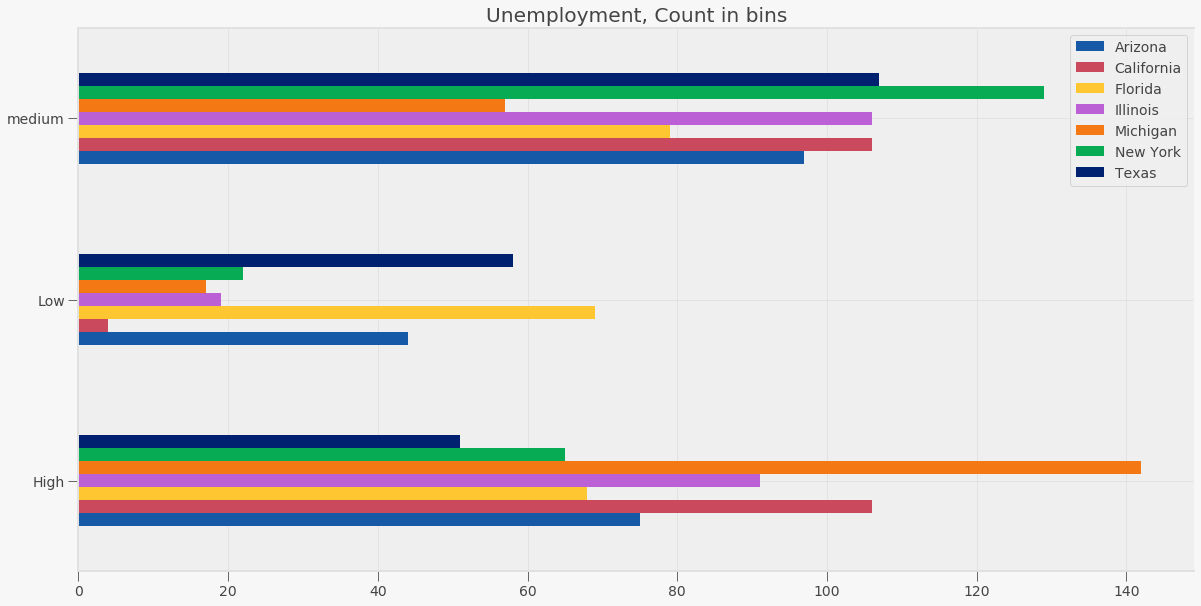

In [63]:
# Your code here

ax = pd_new.plot.barh(figsize=(20, 10))
ax.set_title("Unemployment, Count in bins")
ax.spines['top'].set_visible(True)
ax.set_axisbelow(True)


## Question 4

Repeat Question 3, but count how many states had
each classification in each month. Which month had the most states
with high unemployment? What about medium and low?

Part 1: Write a Python function to classify unemployment levels

In [64]:
# Your code here #stack unstack


def high_medium_low(a):
   
    if a > 6.5:
        out = "High"
    elif a<=4.5:
        out = "Low"
    else:
        out = "medium"

    return out



Part 2: Decide whether you should use `.apply` or `.applymap`.

Part 3: Pass your function from part 1 to the method you determined in Part 2.

In [65]:
#replace this comment with your code!!
unemp_bins_2 = unemp.applymap(high_medium_low)
unemp_bins_3 = unemp_bins_2.stack().unstack(level="Date")
unemp_bins_3


Date,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,2000-09-01,2000-10-01,...,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01
state,,,,,,,,,,,,,,,,,,,,,
Arizona,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium
California,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium,...,medium,medium,medium,medium,medium,medium,Low,Low,Low,Low
Florida,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
Illinois,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium
Michigan,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,...,medium,Low,Low,Low,Low,medium,medium,medium,medium,medium
New York,medium,medium,medium,medium,medium,medium,medium,Low,Low,Low,...,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium
Texas,medium,medium,Low,Low,Low,Low,Low,Low,Low,Low,...,medium,Low,Low,Low,Low,Low,Low,Low,Low,Low


Part 4: Count the number of times each state had each classification.

In [66]:
s_low = (unemp_bins_3=='Low').sum(axis=1)
s_medium = (unemp_bins_3=='medium').sum(axis=1)
s_high = (unemp_bins_3=='High').sum(axis=1)
s_df = pd.concat([s_high,s_low,s_medium], axis=1)
s_df.columns = ['High', 'low','medium']
s_T = s_df.T
s_T

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
High,75,106,68,91,142,65,51
low,44,4,69,19,17,22,58
medium,97,106,79,106,57,129,107


In [67]:
unemp_bins_3.apply(pd.value_counts,axis=1)

,High,Low,medium
state,,,
Arizona,75,44,97
California,106,4,106
Florida,68,69,79
Illinois,91,19,106
Michigan,142,17,57
New York,65,22,129
Texas,51,58,107


In [68]:
unemp_bins_4 = unemp_bins_3.apply(pd.value_counts,axis=0)
unemp_bins_4

Date,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,2000-09-01,2000-10-01,...,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01
High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low,4.0,4.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,...,1.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
medium,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,6.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0


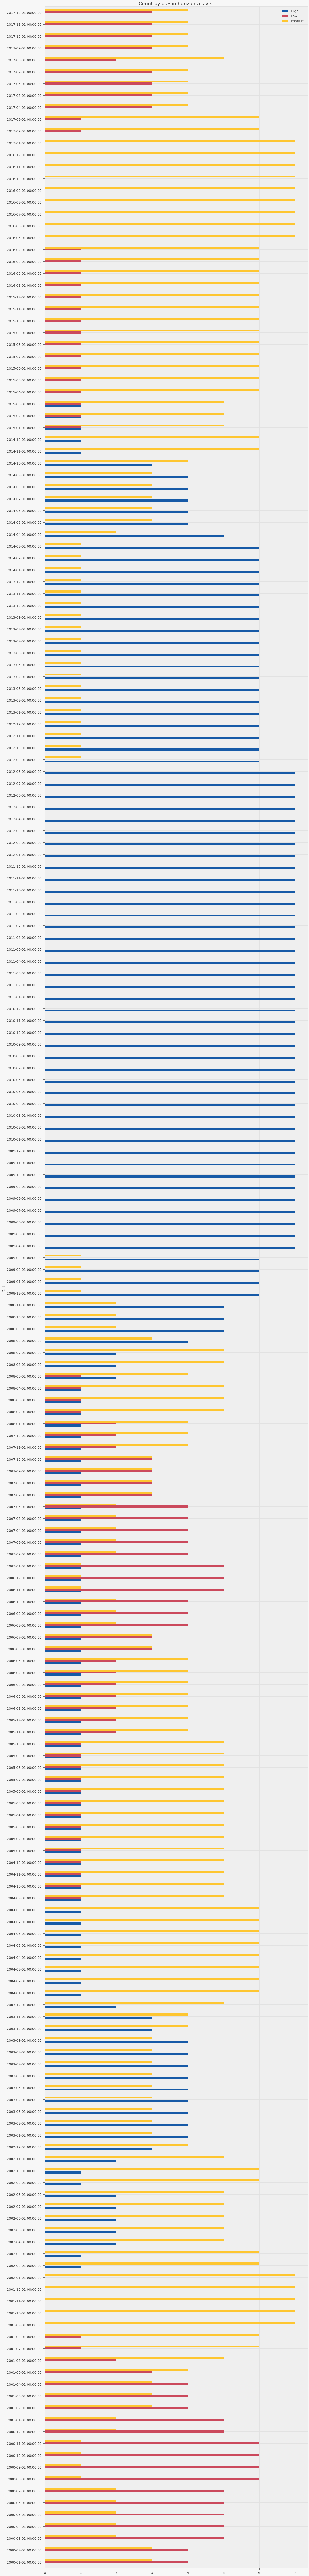

In [69]:
## then make a horizontal bar chart here

ax=unemp_bins_4.T.plot.barh(figsize=(20,200))


ax.set_title("Count by day in horizontal axis ")

ax.spines['top'].set_visible(True)
ax.set_axisbelow(True)
fig.tight_layout()



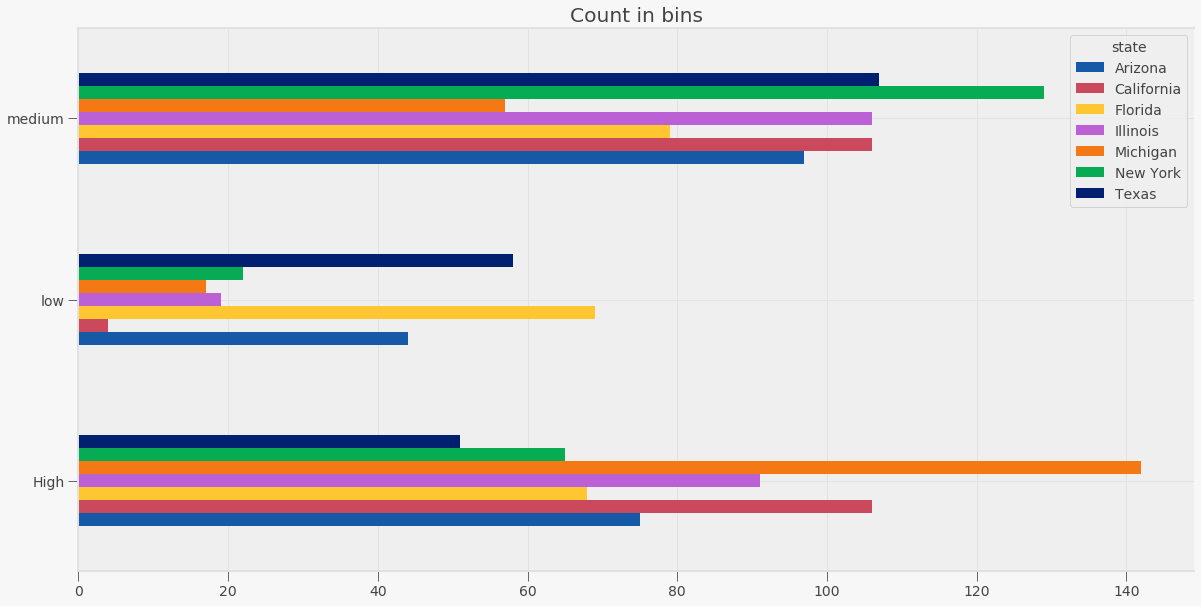

In [70]:
ax = s_T.plot.barh(figsize=(20, 10))
ax.set_title("Count in bins")
ax.spines['top'].set_visible(True)
ax.set_axisbelow(True)




Part 5: Apply the same transformation from Part 4 to each date instead of to each state.

In [71]:
# Your code here
low = (unemp_bins_3=='Low').sum(axis=0)
medium = (unemp_bins_3=='medium').sum(axis=0)
high = (unemp_bins_3=='High').sum(axis=0)
df = pd.concat([high,low,medium], axis=1)
df.columns = ['High', 'low','medium']

df_T = df.T
# find the month of most high, low and medium
print(df_T.idxmax(axis=1))



df_T

High     2009-04-01
low      2000-08-01
medium   2001-09-01
dtype: datetime64[ns]


Date,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,2000-09-01,2000-10-01,...,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01
High,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
low,4,4,5,5,5,5,5,6,6,6,...,1,3,3,3,3,2,3,3,3,3
medium,3,3,2,2,2,2,2,1,1,1,...,6,4,4,4,4,5,4,4,4,4


In [72]:
unemp_bins_3.apply(pd.value_counts)

Date,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,2000-09-01,2000-10-01,...,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01
High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low,4.0,4.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,...,1.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
medium,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,6.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0


In [73]:
#my stupid loop code

row = pd.Series()
for month in unemp_bins.index:
    row_series = unemp_bins.loc[month].value_counts()
    row = pd.concat([row,row_series],axis=1, sort=True)
row.drop(0,axis=1, inplace = True)
largest= row.max(axis=1)
print(largest)
print(row.idxmax(axis=1))
row

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


High      7.0
Low       6.0
medium    7.0
dtype: float64
High     2009-04-01
Low      2000-08-01
medium   2001-09-01
dtype: datetime64[ns]


,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,2000-09-01,2000-10-01,...,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01
High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low,4.0,4.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,...,1.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
medium,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,...,6.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0


In [74]:
#We're also interested in all months not only the first month 
a = df_T.max(axis=1)
df_T.values == a[:,None]

import itertools as IT
import operator
idx = np.where(df_T.values == a[:,None])
groups = IT.groupby(zip(*idx), key=operator.itemgetter(0))
T= [[df_T.columns[j] for i, j in grp] for k, grp in groups]
print("These months are all with most # of high states")
T[0]

These months are all with most # of high states


[Timestamp('2009-04-01 00:00:00'),
 Timestamp('2009-05-01 00:00:00'),
 Timestamp('2009-06-01 00:00:00'),
 Timestamp('2009-07-01 00:00:00'),
 Timestamp('2009-08-01 00:00:00'),
 Timestamp('2009-09-01 00:00:00'),
 Timestamp('2009-10-01 00:00:00'),
 Timestamp('2009-11-01 00:00:00'),
 Timestamp('2009-12-01 00:00:00'),
 Timestamp('2010-01-01 00:00:00'),
 Timestamp('2010-02-01 00:00:00'),
 Timestamp('2010-03-01 00:00:00'),
 Timestamp('2010-04-01 00:00:00'),
 Timestamp('2010-05-01 00:00:00'),
 Timestamp('2010-06-01 00:00:00'),
 Timestamp('2010-07-01 00:00:00'),
 Timestamp('2010-08-01 00:00:00'),
 Timestamp('2010-09-01 00:00:00'),
 Timestamp('2010-10-01 00:00:00'),
 Timestamp('2010-11-01 00:00:00'),
 Timestamp('2010-12-01 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2011-02-01 00:00:00'),
 Timestamp('2011-03-01 00:00:00'),
 Timestamp('2011-04-01 00:00:00'),
 Timestamp('2011-05-01 00:00:00'),
 Timestamp('2011-06-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2011-08-

In [75]:
print("These months are all with most # of low states")
T[1]



These months are all with most # of low states


[Timestamp('2000-08-01 00:00:00'),
 Timestamp('2000-09-01 00:00:00'),
 Timestamp('2000-10-01 00:00:00'),
 Timestamp('2000-11-01 00:00:00')]

In [76]:
print("These months are all with most # of medium states")
T[2]

These months are all with most # of medium states


[Timestamp('2001-09-01 00:00:00'),
 Timestamp('2001-10-01 00:00:00'),
 Timestamp('2001-11-01 00:00:00'),
 Timestamp('2001-12-01 00:00:00'),
 Timestamp('2002-01-01 00:00:00'),
 Timestamp('2016-05-01 00:00:00'),
 Timestamp('2016-06-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2016-08-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-10-01 00:00:00'),
 Timestamp('2016-11-01 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00')]

## Question 5

For a single state of your choice, determine the mean
unemployment during “Low”, “Medium”, and “High” unemployment times.
(recall your `unemp_bins` DataFrame from the exercise above)

In [77]:
# Your code here
#create 3 dataframes which only contain each classfication data respectively
df_high = unemp.where(unemp_bins=='High').mean()
df_medium =  unemp.where(unemp_bins=='medium').mean()
df_low = unemp.where(unemp_bins=='Low').mean()
df_mean_class = pd.concat([df_high,df_medium,df_low], axis=1)

df_mean_class.columns = ['High', 'medium','low']
df_mean_class.T

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
High,8.733333,9.249057,9.155882,8.740659,8.762676,8.169231,7.552941
medium,5.436082,5.454717,5.331646,5.618868,5.407018,5.361240,5.567290
low,4.063636,4.500000,3.807246,4.352632,3.876471,4.340909,4.298276


Which states in our sample performs the best during “bad times?” To
determine this, compute each state’s mean unemployment in
months where the mean unemployment rate is greater than 7.

In [79]:
unemp_mean = unemp.mean(axis = 1)
unemp_mean.head()

Date
2000-01-01    4.228571
2000-02-01    4.214286
2000-03-01    4.185714
2000-04-01    4.200000
2000-05-01    4.214286
dtype: float64

In [81]:
# Your code here
def Greater_than_7(x):
   
    if x > 7:
        out = "BAD"
   
    else:
        out = "OK"

    return out
#take the national average
bad_times = unemp_mean.apply(Greater_than_7)
bad_times



Date
2000-01-01    OK
2000-02-01    OK
2000-03-01    OK
2000-04-01    OK
2000-05-01    OK
              ..
2017-08-01    OK
2017-09-01    OK
2017-10-01    OK
2017-11-01    OK
2017-12-01    OK
Length: 216, dtype: object

In [82]:
df_BAD = unemp.where(bad_times=='BAD')
print(df_BAD.mean())
Series_BAD = df_BAD.mean()
print(Series_BAD.idxmin(), "performed the best during bad times with the mean unemployment rate")
print(Series_BAD.min())

state
Arizona        9.007576
California    10.651515
Florida        9.225758
Illinois       9.480303
Michigan      10.692424
New York       8.131818
Texas          7.131818
dtype: float64
Texas performed the best during bad times with the mean unemployment rate
7.13181818181818


In [86]:
### for practice, no where function
unemp['national_mean'] = unemp.mean(axis=1)
bad_1 = unemp[unemp['national_mean'] > 7]
bad_1_mean = bad_1.mean()
print(bad_1_mean)
bad_1

state
Arizona           9.007576
California       10.651515
Florida           9.225758
Illinois          9.480303
Michigan         10.692424
New York          8.131818
Texas             7.131818
national_mean     9.188745
dtype: float64


state,Arizona,California,Florida,Illinois,Michigan,New York,Texas,national_mean
Date,,,,,,,,
2008-10-01,7.3,8.3,7.4,6.9,8.8,6.0,5.3,7.142857
2008-11-01,7.6,8.7,7.8,7.3,9.3,6.3,5.6,7.514286
2008-12-01,8.0,9.2,8.3,7.8,9.8,6.7,5.8,7.942857
2009-01-01,8.4,9.7,8.8,8.3,10.9,7.1,6.1,8.471429
2009-02-01,8.8,10.1,9.3,8.9,12.0,7.5,6.3,8.985714
...,...,...,...,...,...,...,...,...
2013-11-01,7.5,8.4,6.7,8.7,8.4,7.3,5.9,7.557143
2013-12-01,7.4,8.3,6.7,8.5,8.3,7.1,5.8,7.442857
2014-01-01,7.3,8.2,6.6,8.3,8.1,7.0,5.7,7.314286


In [88]:
print(bad_1_mean.idxmin(), "performed the best during bad times with the mean unemployment rate")
print(bad_1_mean.min())

Texas performed the best during bad times with the mean unemployment rate
7.13181818181818
